# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

`Ваш ответ здесь`



## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




x0 = 0: x_min = 0
x0 = 0: x_max = 0
x0 = 0.5: x_min = 0.975060876515715
x0 = 0.5: x_max = 0.41185702181234396
x0 = 1: x_min = 0.9751376478508075
x0 = 1: x_max = 1.6035293061150784


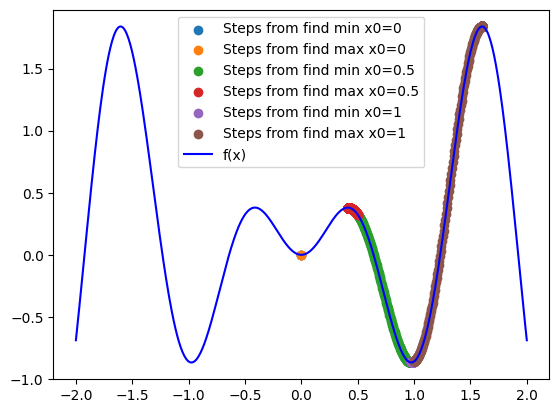

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# Функция и её производная
def f(x):

    result = x * np.sin(5*x) + 0.1 * x**2

    return result

def df(x):

    result = np.sin(5*x) + 5*x * np.cos(5*x) + 0.2 * x

    return result

# Градиентный спуск
def gradient_descent(f, df, x0, eta=0.001, max_iter=1000, tol=1e-6):
    x_curr = x0
    path = []
    path.append((x_curr, df(x_curr), f(x_curr)))

    for i in range(max_iter):
        x_new = x_curr - eta * df(x_curr)
        path.append((x_curr, df(x_curr), f(x_curr)))

        if abs(x_new - x_curr) < tol:
          return x_curr, path

        x_curr = x_new

    return x_curr, path


# Поиск экстремумов
def find_points(f, df, x0, eta, max_iter=1000, tol=1e-6):
      min, path_min = gradient_descent(f=f, df=df, x0=x0, eta=eta, max_iter=max_iter, tol=tol)
      max, path_max = gradient_descent(f=f, df=df, x0=x0, eta=-eta, max_iter=max_iter, tol=tol)
      return (min, max, path_min, path_max)

for xi in [0, 0.5, 1]:
  min, max, path_min, path_max = find_points(f, df, x0=xi, eta=0.001, max_iter=1000, tol=1e-6)
  print(f'x0 = {xi}: x_min = {min}')
  print(f'x0 = {xi}: x_max = {max}')
  x_min, df_min, f_min = zip(*path_min)
  x_max, df_max, f_max = zip(*path_max)
  plt.scatter(x_min, f_min, label=f'Steps from find min x0={xi}')
  plt.scatter(x_max, f_max, label=f'Steps from find max x0={xi}')

x_range = np.linspace(-2, 2, 500)
y_range = f(x_range)

plt.plot(x_range, y_range, label="f(x)", color="blue")
plt.legend()

Алгоритм нашел правильные максимумы и минимумы, кроме максимума для начальной точки x0=0. Так как эта точка экстермум и производная в ней равна 0, то и шаг равен 0 и срабатывает критерий останова.

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [5]:
def ols_solution(X, y):
    m, n = X.shape
    X = np.hstack([np.ones((m, 1)), X])
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w, X

In [6]:
X = np.array([
    [1, 1],
    [2, 3],
    [4, 5],
    [5, 6]
])
y = np.array([1, 2, 4, 5])
w, X_new = ols_solution(X, y)
print(f'w = {np.round(w, 2)}')
X_new @ w

w = [-0.  1.  0.]


array([1., 2., 4., 5.])

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [7]:
np.random.seed(42)

def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost


def stochastic_gradient_descent(X, y, learning_rate, epochs=100, batch_size=1, max_iter=None, verbose=True):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    m = X.shape[0]
    idx = np.arange(m)

    num_steps = m // batch_size
    cost_track = np.zeros((epochs * num_steps,1))
    iter = 0


    for i in range(epochs):
        np.random.shuffle(idx)
        X_shuffled = X[idx]
        y_shuffled = y[idx]

        for j in range(0, num_steps, batch_size):

          params = params - 2./batch_size * learning_rate * (X_shuffled[j: j + batch_size].T @ ((X_shuffled[j: j + batch_size] @ params) - y_shuffled[j: j + batch_size]))
          if verbose:
            cost_track[iter] = compute_cost(X_shuffled, y_shuffled, params)

          iter += 1

          if max_iter is not None and iter >= max_iter:
            return cost_track[: max_iter], params
    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [8]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [9]:
# your code here
def gradient_descent(X, y, learning_rate, iterations, verbose=True):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))

        if verbose:
          cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

In [10]:
from sklearn.metrics import r2_score
import time
time0 = time.time()
w_ols, _ = ols_solution(X, y)
time1 = time.time()

track_gd, w_gd = gradient_descent(X, y, 0.01, 10000)
time2 = time.time()

track_sgd, w_sgd = stochastic_gradient_descent(X, y, 0.001, 100, 1, 10000)
time3 = time.time()

pred_ols = predict(X, w_ols)
pred_gd = predict(X, w_gd)
pred_sgd = predict(X, w_sgd)

print(f"ols: {time1 - time0:.3f} секунд")
print(f"gd: {time2 - time1:.3f} секунд")
print(f"sgd: {time3 - time2:.3f} секунд")

print(f'ols: {r2_score(y, pred_ols)}')
print(f'gd: {r2_score(y, pred_gd)}')
print(f'sgd: {r2_score(y, pred_sgd)}')

ols: 0.019 секунд
gd: 9.059 секунд
sgd: 3.403 секунд
ols: 0.7511401029736604
gd: 0.7554626185750483
sgd: 0.7498245412748407


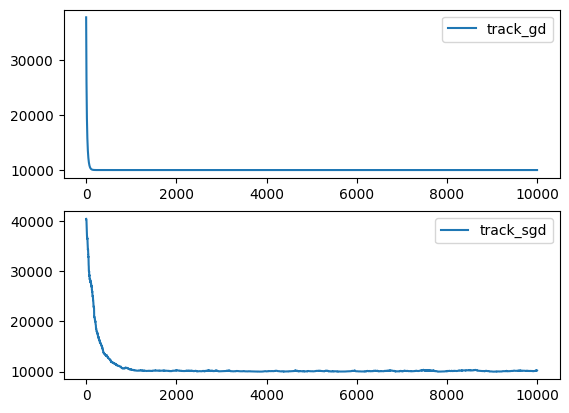

In [11]:
plt.subplot(2,1,1)
plt.plot(track_gd, label='track_gd')
plt.legend()
plt.subplot(2,1,2)
plt.plot(track_sgd, label='track_sgd')
plt.legend()

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

    Все методы справились с задачей

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

    Самым быстрым оказался аналитический метод 0,015 секунд.
    Sgd оказался вторым 0.14 секунды порядка бысрее gd не считать loss по всей Худщий по времени gd 14 секунд.
    
    Из экперементов без вычислений loss на каждом шаге.


4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

    Успешнее всего справился gd, чуть хуже ols. У sgd есть разброс значений на несколько сотых от запуска к запуску, ввиду особеностей метода.

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [37]:
# your code here
def stochastic_gradient_descent_l2(X, y, learning_rate, epochs=100, batch_size=1, max_iter=None, verbose=True, alpha=1):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    m = X.shape[0]
    idx = np.arange(m)

    num_steps = m // batch_size
    cost_track = np.zeros((epochs * num_steps,1))
    iter = 0


    for i in range(epochs):
        np.random.shuffle(idx)
        X_shuffled = X[idx]
        y_shuffled = y[idx]

        for j in range(0, num_steps, batch_size):
          X_batch = X_shuffled[j: j + batch_size]
          y_batch = y_shuffled[j: j + batch_size]
          params = params - 2./batch_size * learning_rate * (X_shuffled[j: j + batch_size].T @ ((X_batch @ params) - y_batch)) - learning_rate * alpha * params
          if verbose:
            cost_track[iter] = compute_cost(X_shuffled, y_shuffled, params)

          iter += 1

          if max_iter is not None and iter >= max_iter:
            return cost_track[: max_iter], params
    return cost_track, params

In [83]:
for alpha in np.linspace(0.0, 1, 11):
  track_sgd_l2, w_sgd_l2 = stochastic_gradient_descent_l2(X, y, 0.001, 100, 1, 100000, alpha=alpha, verbose=False)
  pred_sgd_l2 = predict(X, w_sgd_l2)
  print(f'sgd_l2: {r2_score(y, pred_sgd_l2):.3f} for alpha={alpha:.1f}')

sgd_l2: 0.752 for alpha=0.0
sgd_l2: 0.751 for alpha=0.1
sgd_l2: 0.748 for alpha=0.2
sgd_l2: 0.742 for alpha=0.3
sgd_l2: 0.735 for alpha=0.4
sgd_l2: 0.733 for alpha=0.5
sgd_l2: 0.735 for alpha=0.6
sgd_l2: 0.715 for alpha=0.7
sgd_l2: 0.722 for alpha=0.8
sgd_l2: 0.699 for alpha=0.9
sgd_l2: 0.702 for alpha=1.0


    Лучший результат с alpha=0.1 от запуска к запуску к запуску по-разному. Но без регудяризации модель справляется чуть лучше.

    Лучший R_2 = 0.754

    Так как в данных есть небольшая линейная зависимость и шум, то не большой штраф уменьшит веса, чтобы модель стала проще. При слишком малых alpha модель слишком сложна и обощающая способность падает. При слишком больших модель недоубучается.

    На практике же получили, что без регуляризации получается лучше, что странно. Возможно это связано с тем что мы обучаем на всех данных

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [106]:
def modified_grad_descent(X, y, learning_rate=0.1, epochs=100, batch_size=1, max_iter=None, verbose=True, momentum=0.1): # добавьте в аргументы также специфические для метода оптимизации гиперпараметры
    # your code here

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    m = X.shape[0]
    idx = np.arange(m)

    num_steps = m // batch_size
    cost_track = np.zeros((epochs * num_steps,1))
    iter = 0


    for i in range(epochs):
        np.random.shuffle(idx)
        X_shuffled = X[idx]
        y_shuffled = y[idx]

        for j in range(0, num_steps, batch_size):

          delta_params = -momentum * params - 2./batch_size * learning_rate * (X_shuffled[j: j + batch_size].T @ ((X_shuffled[j: j + batch_size] @ params) - y_shuffled[j: j + batch_size]))
          params = params + delta_params
          if verbose:
            cost_track[iter] = compute_cost(X_shuffled, y_shuffled, params)

          iter += 1

          if max_iter is not None and iter >= max_iter:
            return cost_track[: max_iter], params
    return cost_track, params

In [151]:
track_mtm, w_mtm = modified_grad_descent(X, y, 0.001, 100, 1, 10000, momentum=0.00000001, verbose=False)
pred_mtm = predict(X, w_mtm)
print(f'momentum: {r2_score(y, pred_mtm):.3f} for beta={0.1:.1f}')

momentum: 0.751 for beta=0.1


## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

    В методе Ньютона требуется вычислиять гессиан и обращать его, что для большого количества признаков будет очень догим и затратным по памяти процессом.

    Так же он плохо справляется с задаче если мы стартуем из точки далекой от минимума и требуется подбирать шаг обучения

    Квазиньютоновские методы отчасти рещают проблемы метода Ньютона, но они все еще затратны вычислительно и по памяти в сравнении с SGD и для больших датасетов они не практичны.

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)